In [1]:
import sympy as sp
from functions import *
import numpy as np
from sympy.matrices import matrix_multiply_elementwise
import matplotlib.pyplot as plt 
#sp.init_printing(use_latex="mathjax")
import matplotlib
from numerical import P_num_over_E_single as P_num
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

m_21, m_31, m_41 = sp.symbols("dm_21 dm_31 dm_41", real = True, constant=True)
th_12, th_13,th_23,th_34,th_23,th_14, th_24 = sp.symbols('theta_12 theta_13 theta_23 theta_34 theta_23 theta_14 theta_24', real = True, constant=True)
E = sp.symbols('E', real = True, constant=True)
d_ij=sp.symbols('delta_ij')
V_cc, V_nc,= sp.symbols("V_cc,V_nc", real = True, constant=True)
A_cc, A_nc,= sp.symbols("A_cc,A_nc", real = True, constant=True)
param_dict_num =param_dict # Regular dict with parameter values
param_dict_sym = {'theta_12': th_12, # Symbolic dict with sympy symbols
                'theta_13': th_13,
                'theta_23': th_23,
                'theta_34': th_34,
                'theta_24': th_24,
                'theta_14': th_14,
                'delta_ij': d_ij,
                'dm_21': m_21,
                'dm_31': m_31,
                'dm_41': m_41}

def V_ijab(i,j,a,b,params=param_dict_sym): # Blennow 78:807 delta_ij = 0
    if a == b:
        if a == i or a == j:
            return sp.cos(theta(i,j,0, params=params))
        else:
            return 1
    else:
        if a == i and b == j:
            return sp.sin(-theta(i,j,0, params=params)) 
        elif a == j and b == i:
            return -sp.sin(-theta(i,j,0, params=params))
        else:
            return 0


def V_matrix(i,j, n = 0, params=param_dict_sym): # Blennow 78:807
    result = sp.zeros(3+n,3 + n)
    for a in range(1, 4+n):
        elem1 = [V_ijab(i,j,a,b, params=params) for b in range(1, 3 + n + 1)]
        result[a-1] = elem1
    return result

def U_nu(ndim,params=param_dict_sym, mtype='full'):
    if mtype == 'single':
        return V_matrix(3,4,1, params=params) @ V_matrix(2,4,1, params=params) @ V_matrix(1,4,1, params=params)
    else:
        return V_matrix(3,4,1, params=params) @ V_matrix(2,4,1, params=params) @ V_matrix(1,4,1, params=params) @ V_matrix(2,3,1, params=params) @ V_matrix(1,3,1, params=params)@ V_matrix(1,2,1, params=params)
def get_H_(En,params,mtype, anti, V=None):
    '''
    En in [GeV]
    '''
    if mtype == 'full':
        U = U_nu(4, params=params)
    elif mtype == 'single':
        U = V_matrix(3,4,1, params=params) @ V_matrix(2,4,1, params=params) @ V_matrix(1,4,1, params=params)
    if anti:
        #A = -sp.diag(2*E*V_cc, 0 , 0, 2*E*V_nc)
        M = sp.diag(0,sp.S(params['dm_21']),sp.S(params['dm_31']),sp.S(-params['dm_41']))
    else:
        M = sp.diag(0,sp.S(params['dm_21']),sp.S(params['dm_31']),sp.S(params['dm_41']))
    if V is not None:
        A = sp.diag(sp.S(2*E*V), 0 , 0, sp.S(E*V))
    else:
        A = sp.diag(sp.S(2*E*V_cc), 0 , 0, sp.S(E*V_nc))
    H = sp.S(1/(2*E*1e9)) * (U @ M @ U.T + A*sp.S(1e18))
    H = H.subs(E,En)
    return H

def diagonalize_H_(H,anti):
    #TODO: clean up
    UM_unsorted, HM_unsorted = H.diagonalize(reals_only=False,sort=True, normalize=True) 
    HM_unsorted = np.diag(np.asarray(HM_unsorted))
    UM_unsorted = np.asarray(UM_unsorted)
    if anti:
        UM_sorted = np.array([UM_unsorted[:,0], UM_unsorted[:,2], UM_unsorted[:,1], UM_unsorted[:,3]])
        HM_sorted = np.array([HM_unsorted[0], HM_unsorted[1], HM_unsorted[2], HM_unsorted[3]])
    else:
        UM_sorted = np.array([UM_unsorted[:,1], UM_unsorted[:,2], UM_unsorted[:,3], UM_unsorted[:,0]])
        HM_sorted = np.array([HM_unsorted[1], HM_unsorted[2], HM_unsorted[3], HM_unsorted[0]])
    return UM_sorted, HM_sorted

    
def get_dmM_(HM, En):
    '''
    En in [GeV]
    '''
    eigenvals = HM * np.array([1,1,1,1])
    dmM_res = 2 * En * 1e9 * eigenvals
    return dmM_res


def get_dmM(En, params, mtype, anti):
    '''
    En in [GeV]
    '''
    H = get_H_(En, params=params, mtype=mtype, anti=anti)
    UM,HM= diagonalize_H_(H,anti)
    dmM = get_dmM_(HM, En)
    return dmM

V_cc = np.sqrt(2) * GF * 0.5 * N_A * 8.44 * (1/GeVtocm1)**3 #GeV
V_nc = V_cc / 2 #GeV

ImportError: cannot import name 'P_num_over_E_single' from 'numerical' (c:\Users\marti\thesis\numerical.py)

In [2]:
symb_params_simple = param_dict_sym.copy()
symb_params = param_dict_sym.copy()

symb_params.update({'theta_12': param_dict_num['theta_12'],
                       'theta_13': param_dict_num['theta_13'],
                       'theta_23': param_dict_num['theta_23'],
                       'theta_14': 0,
                       'theta_24': param_dict_sym['theta_24'],
                       'theta_34': param_dict_sym['theta_34'],
                       'dm_21': 0,
                       'dm_31': 0,
                       'dm_41': param_dict_num['dm_41']
                       })

symb_params_simple.update({'theta_12': 1,
                       'theta_13': 1,
                       'theta_23': 1,
                       'theta_14': 0,
                       'theta_24': param_dict_sym['theta_24'],
                       'theta_34': param_dict_sym['theta_34'],
                       'dm_21': 0,
                       'dm_31': 0,
                       'dm_41': param_dict_num['dm_41']
                       })

In [78]:
H=get_H_(E,symb_params,mtype='single', anti=True, V = V_test)
H

Matrix([
[1000000000.0*V,                                                   0,                                                      0,                                                           0],
[             0,                          5.0e-10*sin(theta_24)**2/E,    5.0e-10*sin(theta_24)*sin(theta_34)*cos(theta_24)/E,         5.0e-10*sin(theta_24)*cos(theta_24)*cos(theta_34)/E],
[             0, 5.0e-10*sin(theta_24)*sin(theta_34)*cos(theta_24)/E,            5.0e-10*sin(theta_34)**2*cos(theta_24)**2/E,      5.0e-10*sin(theta_34)*cos(theta_24)**2*cos(theta_34)/E],
[             0, 5.0e-10*sin(theta_24)*cos(theta_24)*cos(theta_34)/E, 5.0e-10*sin(theta_34)*cos(theta_24)**2*cos(theta_34)/E, 5.0e-10*(1.0e+18*E*V + cos(theta_24)**2*cos(theta_34)**2)/E]])

In [77]:
V_test = sp.symbols('V')

In [79]:
res = H.eigenvals()

In [80]:
list(res.keys())[1]

166666666.666667*V - 6.66666666666667e-10*(2.5e+17*(-V - 1.0e-18/E)**2 + 0.75*V*cos(theta_24)**2*cos(theta_34)**2/E - 0.75*V/E)/(-4.0e-27*(-4500000000.0*V - 4.5e-9/E)*(-0.25*V*cos(theta_24)**2*cos(theta_34)**2/E + 0.25*V/E) + (-V - 1.0e-18/E)**3 + sqrt((-4.0e-27*(-4500000000.0*V - 4.5e-9/E)*(-0.25*V*cos(theta_24)**2*cos(theta_34)**2/E + 0.25*V/E) + (-V - 1.0e-18/E)**3 + 2.79173456736647e-51*V*sin(theta_24)**2*sin(theta_34)**2*cos(theta_24)**2/E**2)**2 - 1.0*((-V - 1.0e-18/E)**2 + 3.0e-18*V*cos(theta_24)**2*cos(theta_34)**2/E - 3.0e-18*V/E)**3) + 2.79173456736647e-51*V*sin(theta_24)**2*sin(theta_34)**2*cos(theta_24)**2/E**2)**(1/3) - 166666666.666667*(-4.0e-27*(-4500000000.0*V - 4.5e-9/E)*(-0.25*V*cos(theta_24)**2*cos(theta_34)**2/E + 0.25*V/E) + (-V - 1.0e-18/E)**3 + sqrt((-4.0e-27*(-4500000000.0*V - 4.5e-9/E)*(-0.25*V*cos(theta_24)**2*cos(theta_34)**2/E + 0.25*V/E) + (-V - 1.0e-18/E)**3 + 2.79173456736647e-51*V*sin(theta_24)**2*sin(theta_34)**2*cos(theta_24)**2/E**2)**2 - 1.0*((-V - 1

In [47]:
UM_list = []
#for V in [1e-13,2e-13,3e-13]:
for E in [1e3]:#,2e3,3e3]:
    H=get_H_(E,symb_params,mtype='single', anti=True, V = 1e-13)
    UM, HM = H.diagonalize(reals_only=False,sort=True, normalize=True)
    UM[:,0],UM[:,1] = UM[:,1],UM[:,0]
    UM[:,1],UM[:,2] = UM[:,2],UM[:,1]
    UM_a1 = UM[:,1]
    UM_a4 = UM[:,3]

    UM_e4 = UM_a4[0]
    UM_m4 = UM_a4[1]
    UM_t4 = UM_a4[2]
    UM_s4 = UM_a4[3]

    UM_list.append(UM_t4)

<class 'sympy.matrices.dense.MutableDenseMatrix'>


NameError: name 'UM_list' is not defined

In [48]:
UM_t4

166666666666667.0*(4.99999998333333e+22*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5 + 5.00000001666667e+22)*sin(theta_34)*cos(theta_24)**2*cos(theta_34)/(sqrt(1.11111112592593e-17*(0.999999993333333*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5 + 1)**2*sin(theta_34)**2*cos(theta_24)**4*cos(theta_34)**2/(3.33333333333334e-9*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5*cos(theta_24)**2*cos(theta_34)**2 + 1.0*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5 + 1.00000000444445e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**2 + 1.11111111851852e-17*(3.33333333333334e-9*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5*cos(theta_24)**2 + 1.0*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5 + 6.6666666888889e-9*cos(theta_24)**2*cos(theta_34)**2 + 3.33333335555556e-9*cos(theta_24)**2 + 1)**2*sin(theta_24)**2*cos(theta_24)**2*cos(theta_34)**2/(1.11111111481482e-17*(1.33333334222222e-8*cos(thet

In [49]:
c2_24, c2_34 = sp.symbols('c^2_24 c^2_34', real = True, constant=True)

In [50]:
HM[3,3].subs({sp.cos(th_24)**2: c2_24, sp.cos(th_34)**2: c2_34})

2.49999999166667e-5*(1.33333334222222e-8*c^2_24*c^2_34 + 1)**0.5 + 2.50000000833333e-5

In [191]:
ex1

166666666666667.0*(4.99999998333333e+22*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5 + 5.00000001666667e+22)*sin(theta_34)*cos(theta_24)**2*cos(theta_34)/(sqrt(1.11111112592593e-17*(0.999999993333333*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5 + 1)**2*sin(theta_34)**2*cos(theta_24)**4*cos(theta_34)**2/(3.33333333333334e-9*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5*cos(theta_24)**2*cos(theta_34)**2 + 1.0*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5 + 1.00000000444445e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**2 + 1.11111111851852e-17*(3.33333333333334e-9*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5*cos(theta_24)**2 + 1.0*(1.33333334222222e-8*cos(theta_24)**2*cos(theta_34)**2 + 1)**0.5 + 6.6666666888889e-9*cos(theta_24)**2*cos(theta_34)**2 + 3.33333335555556e-9*cos(theta_24)**2 + 1)**2*sin(theta_24)**2*cos(theta_24)**2*cos(theta_34)**2/(1.11111111481482e-17*(1.33333334222222e-8*cos(thet

In [214]:
ex1 = UM_list[0].subs({sp.cos(th_24)**2: c2_24, sp.cos(th_34)**2: c2_34})
UM_with_constants= ex1
const_list=[]
values_list=[]
const_dict={}
const = sp.numbered_symbols("A", cls=sp.Dummy)
for a in sp.preorder_traversal(ex1):
    if isinstance(a, sp.Float) and a != 0.5:
        c = next(const)
        const_dict[c]=a
        const_list.append(c)
        values_list.append(a)
        UM_with_constants = UM_with_constants.subs(a, c)

In [215]:
const_dict

{_A0: 166666666666667.,
 _A1: 1.00000000000000,
 _A2: 1.11111111851852e-17,
 _A3: 3.33333335555556e-9,
 _A4: 1.00000000000000,
 _A5: 1.33333334222222e-8,
 _A6: 3.33333333333334e-9,
 _A7: 1.33333334222222e-8,
 _A8: 6.66666668888890e-9,
 _A9: 1.00000000000000,
 _A10: 1.33333334222222e-8,
 _A11: 3.33333334444445e-9,
 _A12: 2.22222223703705e-17,
 _A13: 3.33333335925927e-17,
 _A14: 3.33333334444445e-9,
 _A15: 1.33333334222222e-8,
 _A16: 1.33333334000000e-8,
 _A17: 1.11111111481482e-17,
 _A18: 1.33333334222222e-8,
 _A19: 6.66666668888890e-9,
 _A20: 1.33333334222222e-8,
 _A21: 1.11111112592593e-17,
 _A22: 0.999999993333333,
 _A23: 1.33333334222222e-8,
 _A24: 1.00000000000000,
 _A25: 1.33333334222222e-8,
 _A26: 1.00000000444445e-8,
 _A27: 3.33333333333334e-9,
 _A28: 1.33333334222222e-8,
 _A29: 2.49999999166667e+45,
 _A30: 2.49999999166667e+45,
 _A31: 1.33333334222222e-8,
 _A32: 2.50000000277778e+37,
 _A33: 8.33333330555557e+36,
 _A34: 1.33333334222222e-8,
 _A35: 5.00000001666667e+22,
 _A36: 4.

In [216]:
replacements =[]
formulas = []
for UM_t4 in [UM_with_constants]:
    replacement, UM_t4_formula = sp.cse(UM_t4, ignore=[c2_24, c2_34])
    UM_t4_formula = UM_t4_formula[0]
    x = np.array(replacement)[:,1]
    replacements.append(replacement)
    formulas.append(UM_t4_formula)


In [217]:
replacements[0]

[(x0, sin(theta_34))]

In [218]:
UM_with_constants
dm = sp.symbols('dm')
#dm = (const_list[5]*c2_24*c2_34+1)**0.5
# det är mittentermen (prop till s34^2 c24^4 c34^2) som exploderar. Den första termen är konstant (1e-16)**2

_A0*c^2_24*(_A35 + _A36*(_A5*c^2_24*c^2_34 + 1)**0.5)*(_A29 + _A30*(_A5*c^2_24*c^2_34 + 1)**0.5 + _A32*c^2_24*c^2_34 + _A33*c^2_24*c^2_34*(_A5*c^2_24*c^2_34 + 1)**0.5)**(-_A1)*sin(theta_34)*cos(theta_34)/sqrt(_A1 + _A2*c^2_24*c^2_34*(_A3*c^2_24 + _A4*(_A5*c^2_24*c^2_34 + 1)**0.5 + _A6*c^2_24*(_A5*c^2_24*c^2_34 + 1)**0.5 + _A8*c^2_24*c^2_34 + 1)**2*sin(theta_24)**2/(_A11*c^2_24*(_A5*c^2_24*c^2_34 + 1)**0.5 + _A11*c^2_24 + _A12*c^2_24**2*c^2_34**2 + _A13*c^2_24**2*c^2_34 + _A16*c^2_24*c^2_34 + _A17*c^2_24**2*c^2_34*(_A5*c^2_24*c^2_34 + 1)**0.5 + _A8*c^2_24*c^2_34*(_A5*c^2_24*c^2_34 + 1)**0.5 + _A9 + (_A5*c^2_24*c^2_34 + 1)**0.5)**2 + _A21*c^2_24**2*c^2_34*(_A22*(_A5*c^2_24*c^2_34 + 1)**0.5 + 1)**2*sin(theta_34)**2/(_A26*c^2_24*c^2_34 + _A4*(_A5*c^2_24*c^2_34 + 1)**0.5 + _A6*c^2_24*c^2_34*(_A5*c^2_24*c^2_34 + 1)**0.5 + 1)**2)

In [258]:
UM_with_dm = UM_with_constants.subs((const_list[5]*c2_24*c2_34+1)**0.5, dm)

In [260]:
UM_with_dm

_A0*c^2_24*(_A35 + _A36*dm)*(_A29 + _A30*dm + _A32*c^2_24*c^2_34 + _A33*c^2_24*c^2_34*dm)**(-_A1)*sin(theta_34)*cos(theta_34)/sqrt(_A1 + _A2*c^2_24*c^2_34*(_A3*c^2_24 + _A4*dm + _A6*c^2_24*dm + _A8*c^2_24*c^2_34 + 1)**2*sin(theta_24)**2/(_A11*c^2_24*dm + _A11*c^2_24 + _A12*c^2_24**2*c^2_34**2 + _A13*c^2_24**2*c^2_34 + _A16*c^2_24*c^2_34 + _A17*c^2_24**2*c^2_34*dm + _A8*c^2_24*c^2_34*dm + _A9 + dm)**2 + _A21*c^2_24**2*c^2_34*(_A22*dm + 1)**2*sin(theta_34)**2/(_A26*c^2_24*c^2_34 + _A4*dm + _A6*c^2_24*c^2_34*dm + 1)**2)

In [112]:
def dm_func(E,V,theta24,theta34,a):
    return np.sqrt(np.cos(theta24)**2*np.cos(theta34)**2/(a*E*V) + 1)
    #return sp.sqrt(const_list[4]*np.cos(theta24)**2*np.cos(theta34)**2+1)
def func(E,V,theta24,theta34,a):
    dm = dm_func(E,V,theta24,theta34,a)
    s34 = np.sin(theta34)
    s24 = np.sin(theta24)
    return const_list[20]*x[0]**2*x[10]*(const_list[21]*dm+1)**2/(const_list[25]*x[5]+x[5]*const_list[5]*dm+const_list[3]*dm+1)**2
def func_eval(E,V,theta24,theta34,C):
    f = func(E,V,theta24,theta34,a=C)
    f_clear = f.subs(const_dict).subs(replacements[0]).subs(replacements[0]).subs({th_24: theta24, th_34:theta34})
    return f_clear

In [118]:
func_eval(3e3,V,theta24=0.04,theta34=0.02,C=1e22)
#dm_func(E,V,theta24=0.04,theta34=0.02,a=1e-10)


4.42787885074950e-21

In [172]:
(x[0]**2*x[10]*dm_func(E,V,theta24=0.01,theta34=0.02,a=1)).subs(replacements[0]).subs(replacements[0]).subs(const_dict)

1.00000000666333*sin(theta_34)**2*cos(theta_24)**4*cos(theta_34)**2

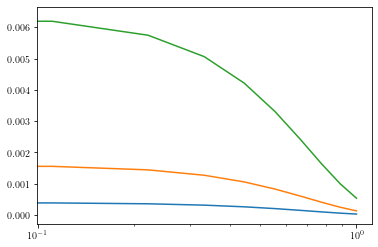

In [181]:
E=3e3
V = 1e-13
theta24 = 0.04
theta34 = 0.02
fig,ax = plt.subplots(1)
U = np.array([(x[0]**2*x[10]*dm_func(E,V,theta24=0.02,theta34=th,a=1e10)).subs(replacements[0]).subs(replacements[0]).subs(const_dict).subs({th_24: th, th_34:0.02}) for th in np.linspace(0,1,10)], dtype=np.float64)
U1 = np.array([(x[0]**2*x[10]*dm_func(E,V,theta24=0.04,theta34=th,a=1e10)).subs(replacements[0]).subs(replacements[0]).subs(const_dict).subs({th_24: th, th_34:0.04}) for th in np.linspace(0,1,10)], dtype=np.float64)
U2 = np.array([(x[0]**2*x[10]*dm_func(E,V,theta24=0.08,theta34=th,a=1e10)).subs(replacements[0]).subs(replacements[0]).subs(const_dict).subs({th_24: th, th_34:0.08}) for th in np.linspace(0,1,10)], dtype=np.float64)
#U1 = [func(En,V,0.04,0.02,1,1,1,1,1) for En in np.linspace(1e3,1e4,100)]
ax.plot(np.linspace(0,1,10),U)
ax.plot(np.linspace(0,1,10),U1)
ax.plot(np.linspace(0,1,10),U2)
#plt.plot(np.linspace(1e3,1e4,100),U1)
ax.set_xscale('log')

<ipython-input-178-e279f9546b76>:5: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(np.linspace(0,1,10),1/np.sqrt(U**2),label='0.02')
<ipython-input-178-e279f9546b76>:6: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(np.linspace(0,1,10),1/np.sqrt(U1**2),label='0.04')
<ipython-input-178-e279f9546b76>:7: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(np.linspace(0,1,10),1/np.sqrt(U2**2),label='0.08')


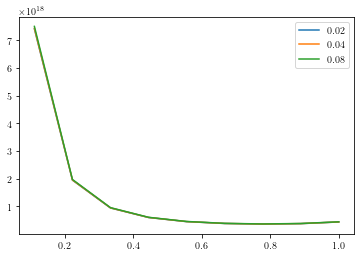

In [178]:
fig,ax = plt.subplots(1)
U = np.array([func_eval(E,V,theta24=0.02,theta34=th,C=1) for th in np.linspace(0,1,10)], dtype=np.float64)
U1 = np.array([func_eval(E,V,theta24=0.04,theta34=th,C=1) for th in np.linspace(0,1,10)], dtype=np.float64)
U2 = np.array([func_eval(E,V,theta24=0.08,theta34=th,C=1) for th in np.linspace(0,1,10)], dtype=np.float64)
ax.plot(np.linspace(0,1,10),1/np.sqrt(U**2),label='0.02')
ax.plot(np.linspace(0,1,10),1/np.sqrt(U1**2),label='0.04')
ax.plot(np.linspace(0,1,10),1/np.sqrt(U2**2),label='0.08')
ax.legend()
#ax.set_xscale('log')

In [176]:
from plotter import P_over_E_parameter
from events import list_of_params
params = list_of_params(ic_params, [1], [0.02,0.04,0.08],np.linspace(0,1,10))
P = P_over_E_parameter('m',params,E_range=[3e3],ndim=4,anti=True)
Pmm = P[:,1].reshape(3,10)

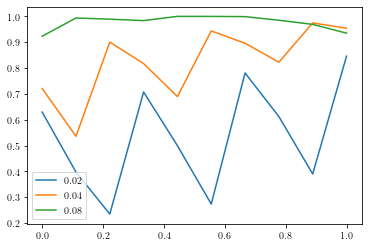

In [177]:
fig, ax = plt.subplots(1)
ax.plot(np.linspace(0,1,10),Pmm[0],label='0.02')
ax.plot(np.linspace(0,1,10),Pmm[1],label='0.04')
ax.plot(np.linspace(0,1,10),Pmm[2],label='0.08')
ax.legend()